In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
CUR_DIR = '~/Kaggle/nyc_taxi_trip_duration'
TRAIN_DATA = os.path.join(CUR_DIR, 'dataset/raw/train.csv')
TEST_DATA = os.path.join(CUR_DIR, 'dataset/raw/test.csv')

PROCESSED_TRAIN_DATA = os.path.join(CUR_DIR, 'dataset/processed/train.csv')
PROCESSED_TEST_DATA = os.path.join(CUR_DIR, 'dataset/processed/test.csv')
SUBMIT_FOLDER = os.path.join(CUR_DIR, 'submissons')

RANDOM_STATE = 34

In [3]:
df_train = pd.read_csv(TRAIN_DATA)
df_test = pd.read_csv(TEST_DATA)

# 1. EDA:

In [4]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435


In [5]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.98813,40.73203,-73.99017,40.75668,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.96420,40.67999,-73.95981,40.65540,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.99744,40.73758,-73.98616,40.72952,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.95607,40.77190,-73.98643,40.73047,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021,40.76147,-73.96151,40.75589,N


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


<h3>Remove redundant features</h3>

- Train dataset: id, dropoff_datetime

- Test dataset: id

In [8]:
# Clean data
df_train.drop('id',inplace=True,axis=1)
df_train.drop('dropoff_datetime',inplace=True,axis=1)

df_test.drop('id',inplace=True,axis=1)

In [9]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


In [10]:
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000
mean,1.53488,1.66177,-73.97361,40.75093,-73.97346,40.75182
std,0.49878,1.31129,0.07339,0.02985,0.07256,0.03582
min,1.00000,0.00000,-121.93313,37.38959,-121.93333,36.60132
25%,1.00000,1.00000,-73.99185,40.73739,-73.99132,40.73600
50%,2.00000,1.00000,-73.98174,40.75409,-73.97977,40.75454
75%,2.00000,2.00000,-73.96740,40.76839,-73.96301,40.76985
max,2.00000,9.00000,-69.24892,42.81494,-67.49680,48.85760


In [11]:
# Check null data
df_train.isnull().sum()

vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
df_test.isnull().sum()

vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

- No missing values in both training and testing dataset.

<h3>Check target</h3>

/home/vanhop/anaconda3/envs/kaggle_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

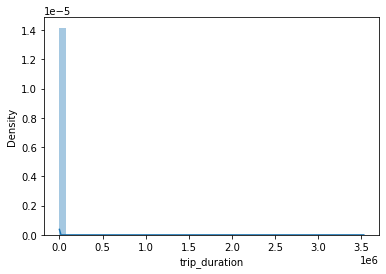

In [13]:
sns.distplot(df_train['trip_duration'])

/home/vanhop/anaconda3/envs/kaggle_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

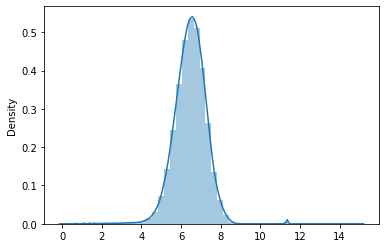

In [14]:
# Better with log transformation for target column
sns.distplot(np.log(df_train['trip_duration'].values))

- Log transformation for target.

In [15]:
df_train['trip_duration']=np.log(df_train['trip_duration'])

In [16]:
df_train['trip_duration'].describe()

count   1458644.00000
mean          6.46452
std           0.79961
min           0.00000
25%           5.98394
50%           6.49527
75%           6.98008
max          15.07575
Name: trip_duration, dtype: float64

# 2. Feature Enginering

In [17]:
import math
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [18]:
def feature_engineering(df_train, df_test):
    # Convert
    df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
    df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])
    
    # Feature Engineering
    df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()
    df_train['hour_of_day'] = df_train['pickup_datetime'].dt.hour
    df_train['month'] = df_train['pickup_datetime'].dt.month
    df_train['store_and_fwd_flag'] = df_train['store_and_fwd_flag'].map({'N':0,'Y':1})
    df_train['distance'] = df_train.apply(lambda row:haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)
    
    df_test['day_of_week'] = df_test['pickup_datetime'].dt.day_name()
    df_test['hour_of_day'] = df_test['pickup_datetime'].dt.hour
    df_test['month'] = df_test['pickup_datetime'].dt.month
    df_test['store_and_fwd_flag'] = df_test['store_and_fwd_flag'].map({'N':0,'Y':1})
    df_test['distance'] = df_test.apply(lambda row:haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)
    
    df_train['day_of_week'] = df_train['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
    df_test['day_of_week'] = df_test['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
    
    df_train.drop('pickup_datetime', inplace=True, axis=1)
    df_train.drop('pickup_latitude', inplace=True, axis=1)
    df_train.drop('pickup_longitude', inplace=True, axis=1)
    df_train.drop('dropoff_longitude', inplace=True, axis=1)
    df_train.drop('dropoff_latitude', inplace=True, axis=1)
    
    df_test.drop('pickup_datetime', inplace=True, axis=1)
    df_test.drop('pickup_latitude', inplace=True, axis=1)
    df_test.drop('pickup_longitude', inplace=True, axis=1)
    df_test.drop('dropoff_longitude', inplace=True, axis=1)
    df_test.drop('dropoff_latitude', inplace=True, axis=1)
    
    return df_train, df_test

In [19]:
feature_df_train, feature_df_test = feature_engineering(df_train, df_test)

In [21]:
feature_df_train.to_csv(PROCESSED_TRAIN_DATA, index=False)
feature_df_test.to_csv(PROCESSED_TEST_DATA, index=False)

# 3. Preprocessing:

In [8]:
target_column = 'trip_duration'

categorical_column = ['vendor_id', 'store_and_fwd_flag', 'day_of_week', 'hour_of_day', 'month']
numerical_column = ['passenger_count', 'distance']

In [9]:
df_train = pd.read_csv(PROCESSED_TRAIN_DATA)
df_test = pd.read_csv(PROCESSED_TEST_DATA)

In [10]:
def one_hot_encoding(df, categorical_column):
    for column in categorical_column:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1)
    return df

In [11]:
df_train = one_hot_encoding(df_train, categorical_column)
df_test = one_hot_encoding(df_test, categorical_column)

In [12]:
df_train

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,month,distance,vendor_id_1,vendor_id_2,...,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23,month_1,month_2,month_3,month_4,month_5,month_6
0,2,1,0,6.12030,1,17,3,1.49852,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,6.49677,7,0,6,1.80551,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,0,7.66106,2,11,1,6.38510,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2,1,0,6.06146,3,19,4,1.48550,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,6.07535,6,13,3,1.18859,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,0,6.65673,5,13,4,1.22508,0,1,...,0,0,0,0,0,0,0,1,0,0
1458640,1,1,0,6.48464,7,7,1,6.04984,1,0,...,0,0,0,0,1,0,0,0,0,0
1458641,2,1,0,6.63857,5,6,4,7.82461,0,1,...,0,0,0,0,0,0,0,1,0,0
1458642,1,1,0,5.92158,2,15,1,1.09256,1,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df_test

,vendor_id,passenger_count,store_and_fwd_flag,day_of_week,hour_of_day,month,distance,vendor_id_1,vendor_id_2,store_and_fwd_flag_0,...,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23,month_1,month_2,month_3,month_4,month_5,month_6
0,1,1,0,4,23,6,2.74643,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,4,23,6,2.75924,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,4,23,6,1.30616,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,2,1,0,4,23,6,5.26909,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1,1,0,4,23,6,0.96084,1,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,1,0,5,0,1,0.96744,1,0,1,...,0,0,0,0,1,0,0,0,0,0
625130,1,1,0,5,0,1,6.19634,1,0,1,...,0,0,0,0,1,0,0,0,0,0
625131,1,2,0,5,0,1,8.15372,1,0,1,...,0,0,0,0,1,0,0,0,0,0
625132,1,1,0,5,0,1,20.38075,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [14]:
def get_input_output(df):
    Y = df['trip_duration'].values
    df.drop('trip_duration', inplace=True, axis=1)
    X = df.values
    return X, Y

In [15]:
X_train, Y_train = get_input_output(df_train)

In [16]:
X_test = df_test.values

In [17]:
from sklearn import preprocessing

In [18]:
def data_normalization(X_train, X_test, scaler):
    scaler.fit(X_train)
    scaler.transform(X_train)
    scaler.transform(X_test)
    return X_train, X_test, scaler

In [19]:
std_scaler = preprocessing.StandardScaler()

X_train, X_test, std_scaler = data_normalization(X_train, X_test, std_scaler)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold, cross_val_score

In [21]:
def get_rmsle(Y, Y_pred):
    error = mean_squared_log_error(Y, Y_pred, squared=False)
    return error

In [22]:
def train(X_train, Y_train, model):
    model.fit(X_train, Y_train)
    train_error = get_rmsle(Y_train, model.predict(X_train))
    return model, train_error

In [23]:
def val(model, X, Y):
    Y_pred = model.predict(X)
    error = get_rmsle(Y, Y_pred)
    return error

In [ ]:
lr_model = GradientBoostingRegressor()
lr_model, train_rmsle = train(X_train, Y_train, lr_model)

In [ ]:
print(f'Train RMSLE : {train_rmsle}')

In [ ]:
def get_pred(X_test, model):
    Y_test_pred = model.predict(X_test)
    # get inverse log with exp
    Y_test_pred = np.exp(Y_test_pred)
    return Y_test_pred

In [ ]:
Y_test_pred = get_pred(X_test, lr_model)

In [ ]:
def create_submission(Y_test_pred, submission_name):
    submission_df = pd.read_csv(TEST_DATA)
    submission_df['trip_duration'] = Y_test_pred.tolist()
    submission_df = submission_df[['id', 'trip_duration']]
    submission_df.to_csv(os.path.join(SUBMIT_FOLDER, submission_name), index=False)
    print(f'Create submission {submission_name}')

In [ ]:
create_submission(Y_test_pred, 'baseline_gradient_boosting.csv')

# 4. Model Selection:

In [43]:
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'Decision_Tree_Regressor', 
         'Random_Forest_Regressor', 'Gradient_Boosting_Regressor',
         'Adaboost_Regressor']
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

In [44]:
Models = []
Errors = []

In [45]:
def input_scores(name, model, X, Y, cv):
    Models.append(name)
    error = cross_val_score(model, X, Y, cv=cv, scoring=val).mean()
    print(name, ':', error)
    Errors.append(error)

In [ ]:
cv = KFold(5, random_state = RANDOM_STATE, shuffle=True)
for name, model in zip(names, models):
    input_scores(name, model, X_train, Y_train, cv)

Linear_Regression : 0.09234364341632775
Ridge_Regression : 0.09234391342389123
Lasso_Regression : 0.10195409666372701
Decision_Tree_Regressor : 0.0972403308779252


In [ ]:
evaluation = pd.DataFrame({'Model': Models,
                           'Error': Errors})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation